In [155]:
# Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))

In [156]:
df1=pd.read_csv('Churn_Modelling.csv')

In [157]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
df=df1.copy()

## Convert all the columns heading in lower case

In [159]:
clean_column_name=[]

columns=df.columns
for i in range(len(columns)):
    clean_column_name.append(columns[i].lower())
df.columns=clean_column_name

In [160]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

#### Drop the irrelevant columns

In [161]:
df=df.drop(["rownumber","customerid","surname"], axis=1)

#### Separating churn and not churn

In [162]:
churn=df[df["exited"]==1]
not_churn=df[df["exited"]==0]

In [163]:
target_col=["excited"]
cat_cols=df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols=[ i for i in cat_cols if i not in target_col]
num_cols=[i for i in df.columns if i not in cat_cols+target_col]

### EDA

In [164]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
df.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

In [166]:
df[df.columns[:10]].describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


#### Median

In [167]:
df[df.columns[:10]].median()

creditscore           652.000
age                    37.000
tenure                  5.000
balance             97198.540
numofproducts           1.000
hascrcard               1.000
isactivemember          1.000
estimatedsalary    100193.915
dtype: float64

In [168]:
df[df.columns[:10]].mean()

creditscore           650.528800
age                    38.921800
tenure                  5.012800
balance             76485.889288
numofproducts           1.530200
hascrcard               0.705500
isactivemember          0.515100
estimatedsalary    100090.239881
dtype: float64

### Percentge per category in the target variable

In [169]:
percentage_labels=df['exited'].value_counts(normalize=True)*100
percentage_labels

0    79.63
1    20.37
Name: exited, dtype: float64

### Graphical representation of the target label percentage

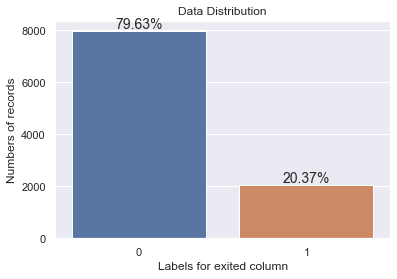

In [170]:
total_len=len(df['exited'])
sns.set()
sns.countplot(df.exited).set_title('Data Distribution')
ax= plt.gca()
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           '{:.2f}%'.format(100 * (height/total_len)),
           fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

### Distribution of categorical variable

In [171]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                 x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
#for all categorical columns plot pie
#for i in cat_cols :
    #plot_pie(i)

In [172]:
plot_pie(cat_cols[0])

In [173]:
plot_pie(cat_cols[1])

In [174]:
plot_pie(cat_cols[2])

In [175]:
plot_pie(cat_cols[3])

In [176]:
plot_pie(cat_cols[4])

In [177]:
#function  for histogram for customer churn types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                          gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [178]:
histogram(num_cols[0])

In [179]:
histogram(num_cols[1])

In [180]:
histogram(num_cols[2])

In [181]:
histogram(num_cols[3])

### Correlations

In [182]:
df[df.columns].corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


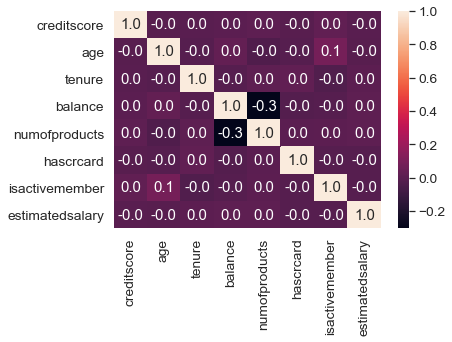

In [183]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(df[df.columns[:10]].corr(), annot=True,fmt=".1f")
plt.show()

### Detection and handling outliers

In [184]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )

new_df = df[num_cols[:1]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

In [185]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = df[num_cols[1:3]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

In [186]:
# handling age column outliers

ageNew=[]
for val in df.age:
    if val<=85:
        ageNew.append(val)
    else:
        ageNew.append(df.age.median())
        
df.age=ageNew

In [187]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = df[num_cols[3:]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

### Data preperation

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
le_gender=LabelEncoder()
le_geography=LabelEncoder()


In [190]:
df['gender_n']=le_gender.fit_transform(df['gender'])
df['geography_n']=le_geography.fit_transform(df['geography'])

In [191]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_n,geography_n
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,2
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,2


In [192]:
df=df.drop(['gender','geography'],axis='columns')

In [193]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_n,geography_n
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,2


### Supervised learning techniques

### Preparing the data

In [194]:
# We will use the data frame where we had created dummy variables
y = df['exited'].values
X = df.drop(columns = ['exited'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [195]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### DecisionTree Classifier

In [198]:
from sklearn import tree

In [199]:
model=tree.DecisionTreeClassifier()

In [200]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [209]:
model.score(X_train,y_train)

1.0

In [211]:
# specificly predict by giving some inputs

model.predict([[619,42.0,2,0.00,1,1,1,101348.88,1,0]])

array([0], dtype=int64)

#### Predictions

In [203]:
dtree_pred=model.predict(X_test)

In [204]:
print(dtree_pred[:5])
print(y_test[:5])

[0 0 0 0 1]
[0 0 1 0 1]


#### Evaluation

In [205]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, dtree_pred))

DecisionTrees's Accuracy:  0.7926666666666666


### KMeans 

In [196]:
x1=np.asarray(X_test)

kmean=KMeans(6)
kmean.fit(X_test)
labels=kmean.labels_


In [197]:
len(labels)

3000

In [139]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,cluster
0,619,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,3.0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,2.0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,1.0
3,699,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,2.0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,0.0


In [140]:
clusters.cluster.value_counts()

2.0    819
1.0    643
3.0    410
5.0    403
0.0    374
4.0    351
Name: cluster, dtype: int64

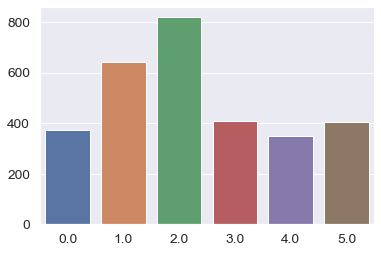

In [141]:
sns.barplot(x=list(clusters.cluster.value_counts().to_dict().keys()), 
            y=list(clusters.cluster.value_counts().to_dict().values()))

In [142]:
clusters.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_France',
       'geography_Germany', 'geography_Spain', 'gender_Female', 'gender_Male',
       'cluster'],
      dtype='object')

In [145]:
names=[ 'gender_Female', 'gender_Male', 'geography_Germany',
       'geography_Spain', 'geography_France', 'age',
       'tenure', 'numofproducts',
       'isactivemember']

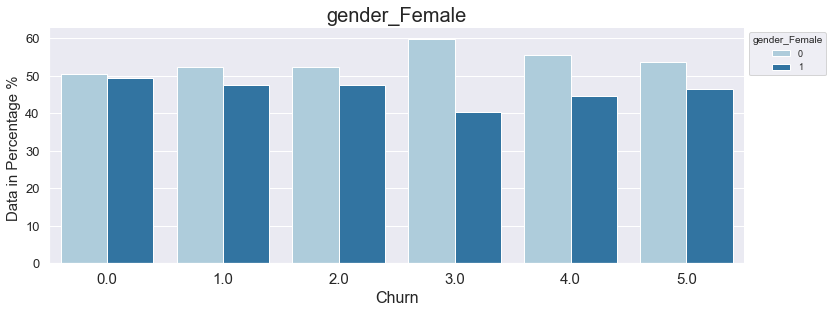

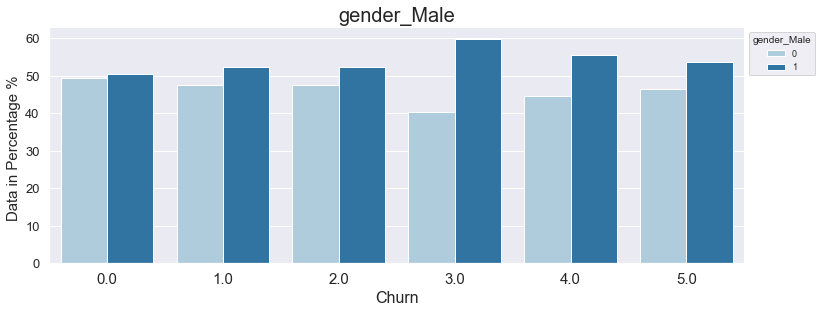

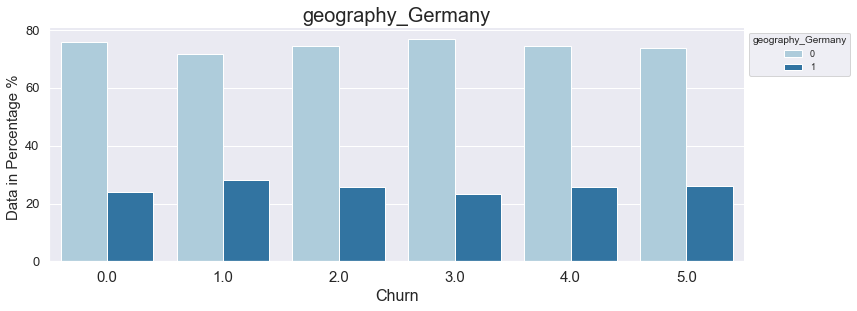

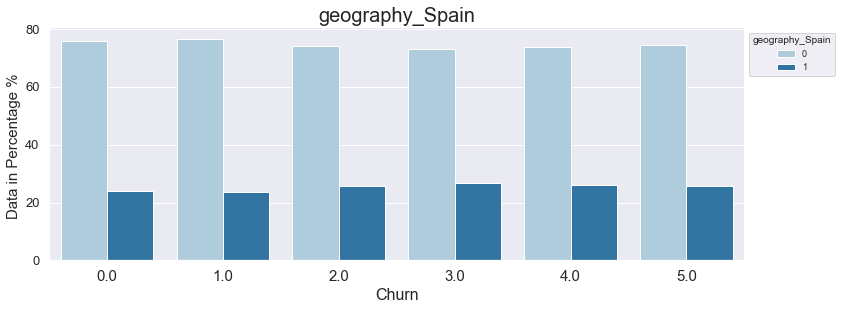

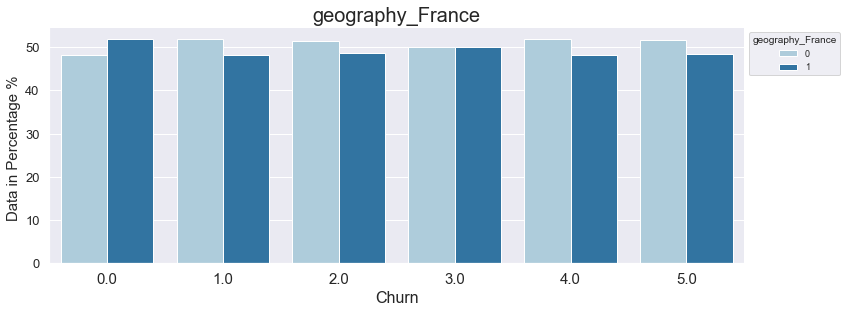

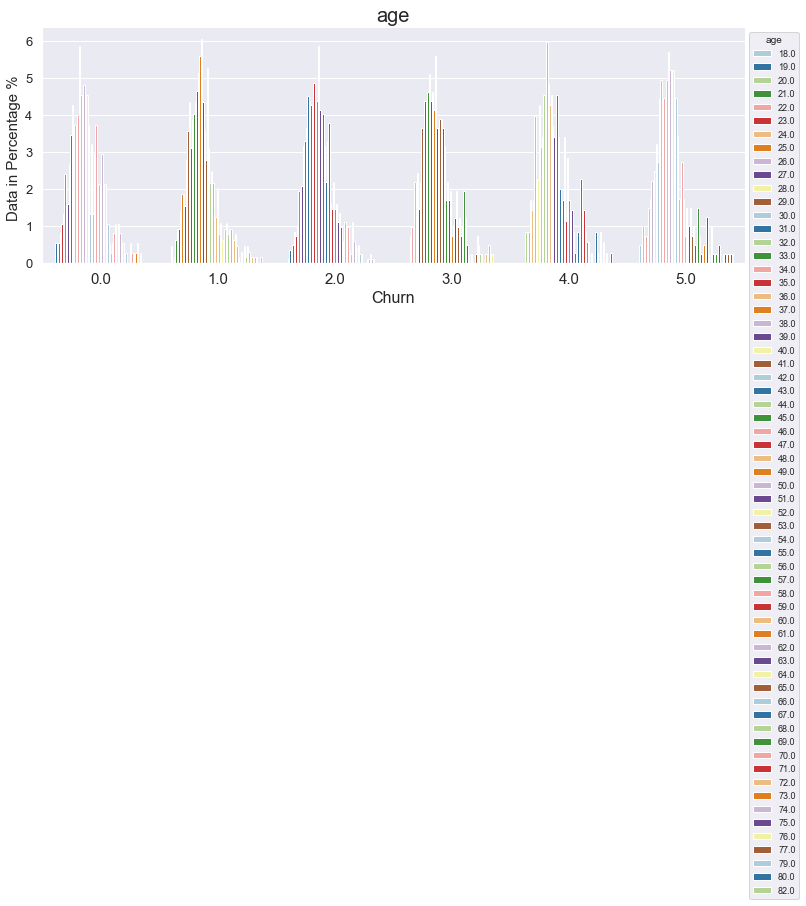

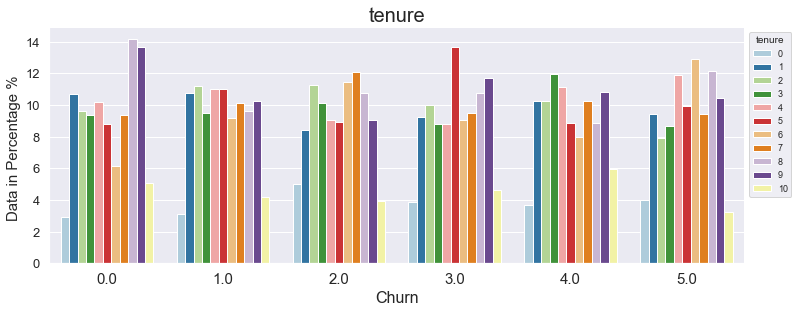

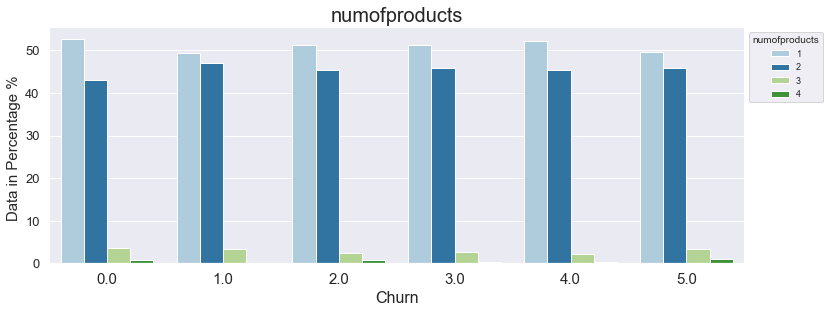

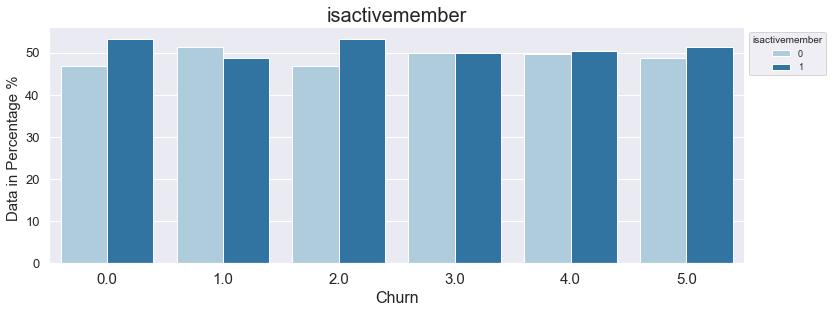

In [146]:
for i in names:
    
    x,y = 'cluster',i
    t= i
   # plt.figure(figsize=[15,5])
    (clusters
    .groupby(x)[y]
    .value_counts(normalize=True)
     .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x, 
                                y='percent', 
                                hue=y,kind='bar',
                                palette="Paired",
                                height=4.27, 
                                aspect=10.7/4.27,
                                legend=False))
    plt.title( t , size=20)
    plt.ylabel("Data in Percentage % ", size=15)
    plt.xlabel("Churn", size=16)
    plt.yticks(size=13)
    plt.xticks(size=15)
    plt.legend(title=t, fontsize=9, title_fontsize=10, loc='best', bbox_to_anchor=(1, 1))
    plt.show()

### Decision Tree

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
result = model.fit(X_train, y_train);


In [81]:
from sklearn import metrics

prediction_test = result.predict(X_test)
# Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
classification = metrics.classification_report(y_test, prediction_test)
print()
print('============================== Model Evaluation =============================='.format(i))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


============================== Model Evaluation ==============================

Model Accuracy:
 0.7976666666666666

Confusion matrix:
 [[2062  316]
 [ 291  331]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2378
           1       0.51      0.53      0.52       622

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000




### SVM

In [82]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
result = model.fit(X_train, y_train);

In [83]:
from sklearn import metrics

prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
classification = metrics.classification_report(y_test, prediction_test)
print()
print('============================== Model Evaluation =============================='.format())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


============================== Model Evaluation ==============================

Model Accuracy:
 0.7926666666666666

Confusion matrix:
 [[2378    0]
 [ 622    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000




### Logistic Regression

In [84]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
result = lr.fit(X_train, y_train); 

In [41]:
from sklearn import metrics
from sklearn.metrics import roc_curve
prediction_test = lr.predict(X_test)
# Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
classification = metrics.classification_report(y_test, prediction_test)
fpr1 , tpr1, _ = roc_curve(y_test, prediction_test)
print()
print('============================== Model Evaluation =============================='.format(i))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


============================== Model Evaluation ==============================

Model Accuracy:
 0.806

Confusion matrix:
 [[2298   80]
 [ 502  120]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.60      0.19      0.29       622

    accuracy                           0.81      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.77      0.81      0.76      3000




### Hyper parameter tunning

 * `Grid search` 
it will give results by different permutation and combinations provided by `"C":np.logspace(-3,3,7)` 


* `Random search`
it will not do any permutation and combination but it do this randomlu=y



#### Grid search for logistic regression

In [85]:
'''# Random search 

from sklearn.model_selection import RandomizedSearchCV as rs
rs= RandomizedSearchCV(lr),{
         'C':[1,10,20],
         'kernel':['l1','l2']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(X_train, y_train)
predictions= rf.predict(X_test)

print("Accuracy of LogisticRegression (%): \n", accuracy_score(y_test, predictions)*100)#get FPR (specificity) and TPR (sensitivity)
fpr3 , tpr3, _ = roc_curve(y_test, predictions)
print("AUC of LogisticRegression (%): \n",auc(fpr3, tpr3)*100)
print("Precision: \n",precision_score(y_test, predictions)*100)
print("Recall (%): \n",recall_score(y_test, predictions)*100)
# examine the best model
# Single best score achieved across all params (min_samples_split)
print("Best Score (%): \n",clf.best_score_*100)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print("Best Parametres : \n", clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Estimator : \n", clf.best_estimator_)'''

'# Random search \n\nfrom sklearn.model_selection import RandomizedSearchCV as rs\nrs= RandomizedSearchCV(lr),{\n         \'C\':[1,10,20],\n         \'kernel\':[\'l1\',\'l2\']\n    },\n    cv=5,\n    return_train_score=False,\n    n_iter=2\n)\nrs.fit(X_train, y_train)\npredictions= rf.predict(X_test)\n\nprint("Accuracy of LogisticRegression (%): \n", accuracy_score(y_test, predictions)*100)#get FPR (specificity) and TPR (sensitivity)\nfpr3 , tpr3, _ = roc_curve(y_test, predictions)\nprint("AUC of LogisticRegression (%): \n",auc(fpr3, tpr3)*100)\nprint("Precision: \n",precision_score(y_test, predictions)*100)\nprint("Recall (%): \n",recall_score(y_test, predictions)*100)\n# examine the best model\n# Single best score achieved across all params (min_samples_split)\nprint("Best Score (%): \n",clf.best_score_*100)\n# Dictionary containing the parameters (min_samples_split) used to generate that score\nprint("Best Parametres : \n", clf.best_params_)\n# Actual model object fit with those bes

In [148]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
            },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


NameError: name 'svm' is not defined

In [ ]:
scores=[]


for model_name, np in moddel_params.items():
    clf=GridSearchCV(np['model'], np['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best_score':clf_best_score_,
        'best_params':clf_best_params_,
    })